In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
data = pd.read_csv('../data_cleaned.csv')
data.head()

,wk_strt_dt,yr_nbr,qtr_nbr,prd,wk_nbr,wk_in_yr_nbr,mdip_dm,mdip_inst,mdip_nsp,mdip_auddig,...,st_ct,mrkdn_valadd_edw,mrkdn_pdm,va_pub_0.15,va_pub_0.2,va_pub_0.25,va_pub_0.3,Electronics,unemployment_rate,is_holiday_week
0,2014-08-03,2014,3,7,1,27,4863885,29087520,2421933,692315,...,716.285714,0.0,0.368029,1,0,0,0,63,7.0,0
1,2014-08-10,2014,3,7,2,28,20887502,8345120,3984494,475810,...,716.428571,0.0,0.360911,1,0,0,0,54,7.0,0
2,2014-08-17,2014,3,7,3,29,11097724,17276800,1846832,784732,...,717.000000,0.0,0.344832,1,1,0,0,54,7.0,0
3,2014-08-24,2014,3,7,4,30,1023446,18468480,2394834,1032301,...,717.000000,0.0,0.356973,1,1,0,0,45,7.0,0
4,2014-08-31,2014,3,8,1,31,21109811,26659920,3312008,400456,...,717.000000,0.0,0.359990,0,1,0,0,52,7.0,1


In [5]:
data.shape

(209, 42)

In [4]:
df = data.loc[:,['wk_strt_dt','sales']]
df.columns = ['ds','y']

In [6]:
df_train = df.loc[:157,:]
df_test = df.loc[157:,:]

In [7]:
m = Prophet()

In [8]:
m.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
df_test.shape

(52, 2)

In [14]:
future = m.make_future_dataframe(periods=51, freq='W')
future.tail()

,ds
204,2018-07-01
205,2018-07-08
206,2018-07-15
207,2018-07-22
208,2018-07-29


In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
204,2018-07-01,8.058238e+07,3.405111e+07,1.261108e+08
205,2018-07-08,7.332108e+07,2.879841e+07,1.191254e+08
206,2018-07-15,6.786391e+07,2.209511e+07,1.118275e+08
207,2018-07-22,6.873628e+07,3.097204e+07,1.165570e+08
208,2018-07-29,7.637343e+07,3.096691e+07,1.193602e+08


In [22]:
forecast.shape

(209, 16)

## Plots

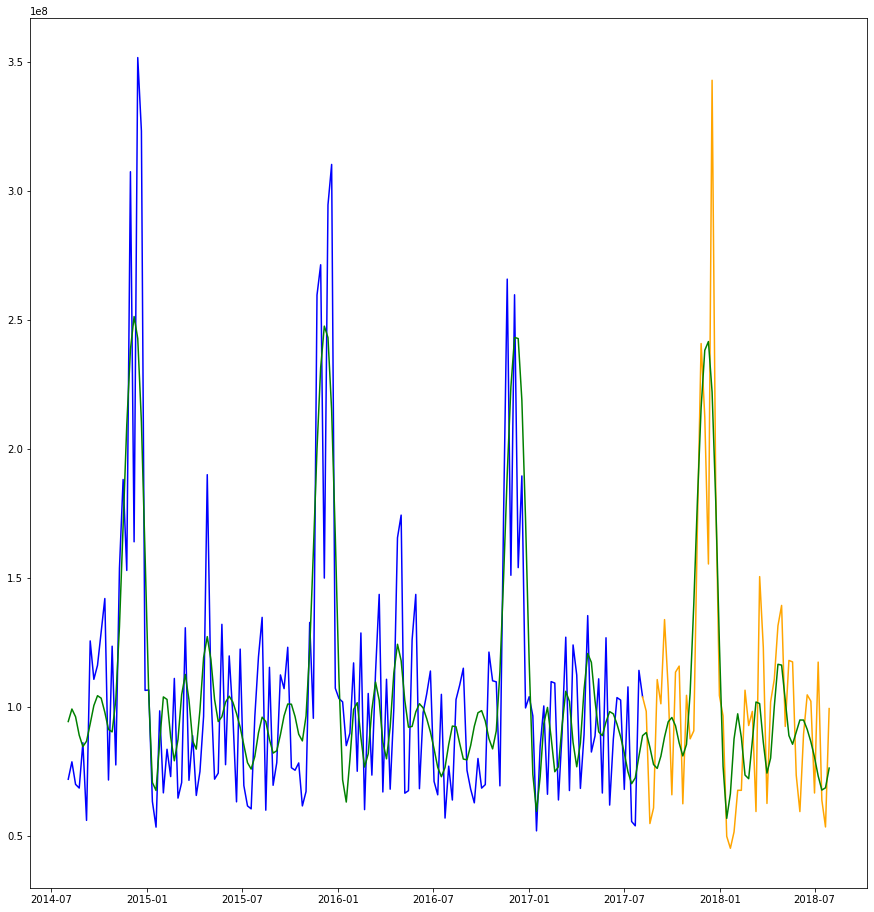

In [30]:
# Plot data.
plt.figure(figsize=(15,16))
plt.plot(pd.to_datetime(df.loc[:157,'ds']), df_train['y'], color = 'blue')
plt.plot(pd.to_datetime(df.loc[157:,'ds']), df_test['y'], color = 'orange')
plt.plot(pd.to_datetime(df.loc[:,'ds']), forecast['yhat'], color = 'green')
plt.show();

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


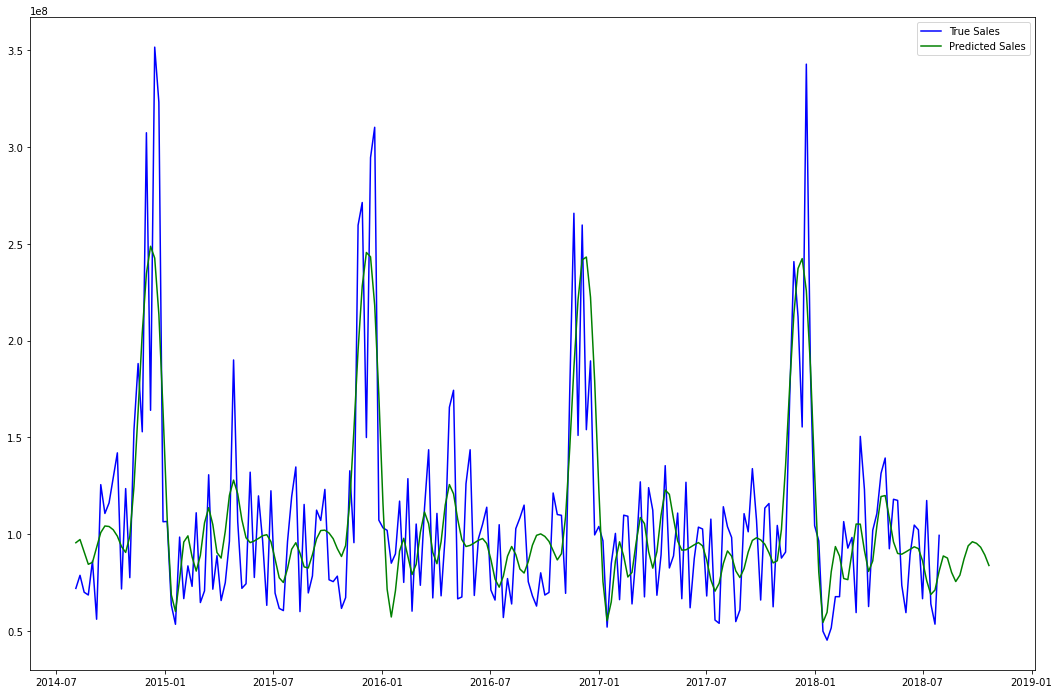

In [13]:
(user_data_filepath, user_date_column, kpi_column, future_periods) = ('../data_cleaned.csv', 'wk_strt_dt','sales',12)
data = pd.read_csv(user_data_filepath)
df = data.loc[:,[user_date_column, kpi_column]]
df.columns = ['ds','y']

m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods = future_periods, freq = 'W')
forecast = m.predict(future)

f = plt.figure(figsize=(18,12))
plt.plot(pd.to_datetime(forecast.loc[:df.shape[0]-1,'ds']), df['y'], color = 'blue',label=f'True {kpi_column} Value')
plt.plot(pd.to_datetime(forecast.loc[:,'ds']), forecast['yhat'], color = 'green', label = f'Predicted {kpi_column} Value')
plt.legend()
plt.show();

## Metrics

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
pred_train = forecast.loc[:157,'yhat']
pred_test = forecast.loc[157:,'yhat']

In [27]:
r2_score(df_train['y'],pred_train)

0.6059280918464258

In [28]:
r2_score(df_test['y'],pred_test)

0.6142776775411349

In [29]:
mean_squared_error(df_train['y'],pred_train)

1199304501834233.8